In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data =pd.read_csv('3e.csv')
pd.set_option("display.max_columns", None)

In [3]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

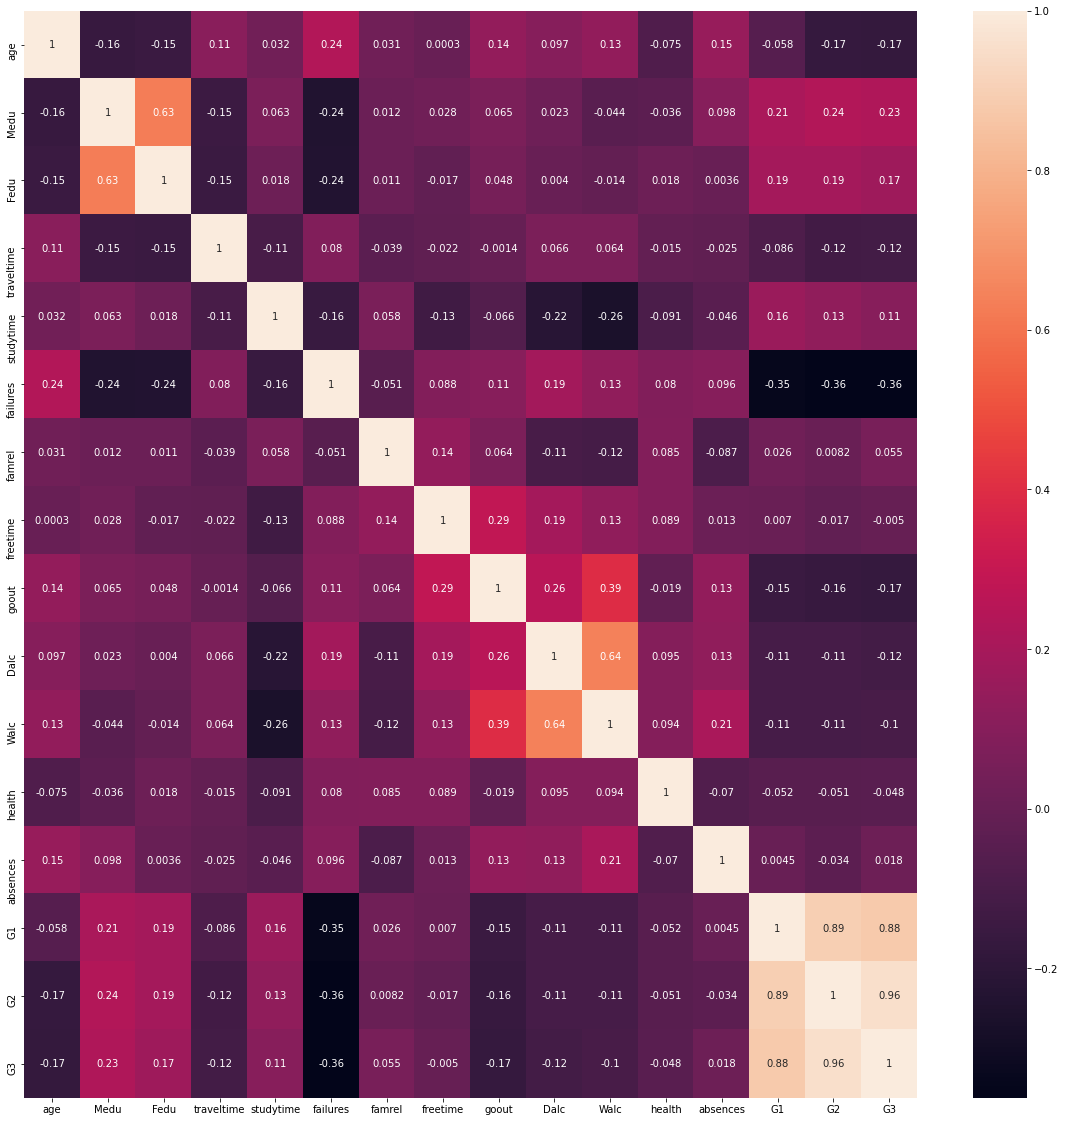

In [6]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

In [7]:
df=data.drop(['G1','G2'],axis=1)

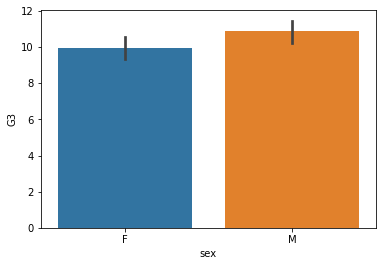

In [8]:
sns.barplot(x=df['sex'],y=df['G3'],data=df)
plt.show()

performance of Male are better then female

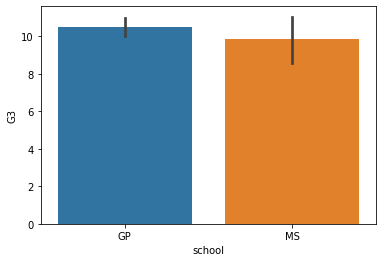

In [9]:
sns.barplot(x=df['school'],y=df['G3'],data=df)
plt.show()

gp school performs good

C:\Users\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


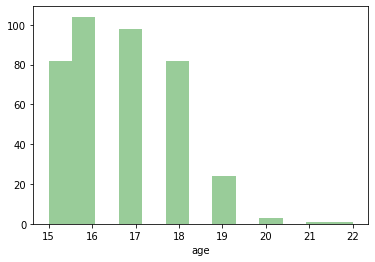

In [37]:
sns.distplot(df['age'], kde= False, color = 'g')
plt.show()

C:\Users\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


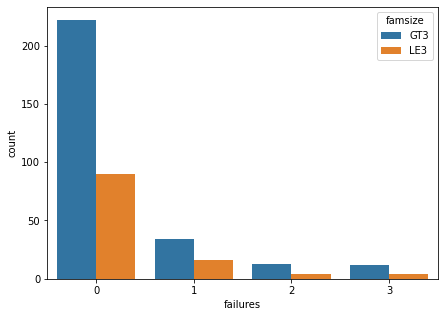

In [38]:
plt.figure(figsize = (7,5))
sns.countplot(df['failures'], hue = data['famsize'])
plt.show()

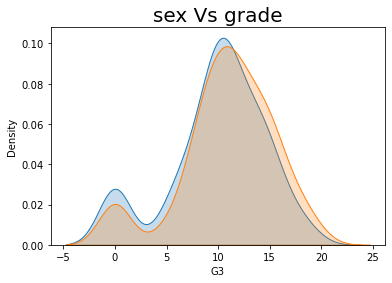

In [39]:
sns.kdeplot(df.loc[data['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(df.loc[data['sex'] == 'M', 'G3'], label='Male', shade = True)
plt.title('sex Vs grade', fontsize = 20)
plt.show()

In [13]:
df1=pd.get_dummies(df,drop_first=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
category_colums = df.select_dtypes('object').columns
for i in category_colums:
    df[i] = enc.fit_transform(df[i])

bulid model

In [35]:
x=df1.drop(columns="G3")
y=df1["G3"]

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=14)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
k_fold = KFold(n_splits=10, random_state=10, shuffle=True)

In [36]:
classifiers = {
    'Linear Regression' : LinearRegression(),
    'RandromForest': RandomForestRegressor(n_estimators=100),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100),
    'SVM' : SVR()}

for key, clf in classifiers.items():
    score = cross_val_score(clf, x_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

RMSE score with CV of Linear Regression is 4.32
RMSE score with CV of RandromForest is 3.85
RMSE score with CV of GradientBoost is 3.91
RMSE score with CV of SVM is 4.31
